In [ ]:
import xarray as xr
import glob
import cfgrib

# Ensure cfgrib is installed
try:
    import cfgrib
except ImportError:
    raise ImportError("cfgrib is not installed. Install it using: pip install cfgrib")



# Step 1: Define directory path
grib_dir = "/content/data"

# Step 2: Get all GRIB files in the directory
grib_files = sorted(glob.glob(grib_dir + "/rh_*.grib"))

# Step 3: Debugging print statements
print("Found GRIB files:", grib_files)

# Step 4: Open files and check time dimension
ds_list = []
for file in grib_files:
    try:
        ds = xr.open_dataset(file, engine="cfgrib")

        # Print available variables and dimensions
        print(f"Reading {file}:")
        print("Variables:", list(ds.variables))
        print("Dimensions:", ds.dims)

        if "time" not in ds.dims:
            print(f"Warning: 'time' dimension missing in {file}. Skipping.")
        else:
            ds_list.append(ds)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Step 5: Merge datasets if any were successfully opened
if ds_list:
    ds = xr.concat(ds_list, dim="time", combine_attrs="override")
    print("Merged dataset is ready.")
else:
    print("No valid datasets found. Check file paths and content.")


Found GRIB files: ['/content/data/rh_1990-95.grib', '/content/data/rh_1996-02.grib', '/content/data/rh_2002-07.grib', '/content/data/rh_2008-13.grib', '/content/data/rh_2014-19.grib', '/content/data/rh_2020-25.grib']


/usr/local/lib/python3.11/dist-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


Reading /content/data/rh_1990-95.grib:
Variables: ['number', 'time', 'step', 'isobaricInhPa', 'latitude', 'longitude', 'valid_time', 'r']
Dimensions: FrozenMappingWarningOnValuesAccess({'time': 52584, 'latitude': 32, 'longitude': 5})


/usr/local/lib/python3.11/dist-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


Reading /content/data/rh_1996-02.grib:
Variables: ['number', 'time', 'step', 'isobaricInhPa', 'latitude', 'longitude', 'valid_time', 'r']
Dimensions: FrozenMappingWarningOnValuesAccess({'time': 52608, 'latitude': 32, 'longitude': 5})


/usr/local/lib/python3.11/dist-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


Reading /content/data/rh_2002-07.grib:
Variables: ['number', 'time', 'step', 'isobaricInhPa', 'latitude', 'longitude', 'valid_time', 'r']
Dimensions: FrozenMappingWarningOnValuesAccess({'time': 52584, 'latitude': 32, 'longitude': 5})


/usr/local/lib/python3.11/dist-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


Reading /content/data/rh_2008-13.grib:
Variables: ['number', 'time', 'step', 'isobaricInhPa', 'latitude', 'longitude', 'valid_time', 'r']
Dimensions: FrozenMappingWarningOnValuesAccess({'time': 52608, 'latitude': 32, 'longitude': 5})


/usr/local/lib/python3.11/dist-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


Reading /content/data/rh_2014-19.grib:
Variables: ['number', 'time', 'step', 'isobaricInhPa', 'latitude', 'longitude', 'valid_time', 'r']
Dimensions: FrozenMappingWarningOnValuesAccess({'time': 52584, 'latitude': 32, 'longitude': 5})


ERROR:cfgrib.messages:skipping corrupted Message
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/cfgrib/messages.py", line 274, in itervalues
    yield self.filestream.message_from_file(file, errors=errors)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/cfgrib/messages.py", line 341, in message_from_file
    return Message.from_file(file, offset, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/cfgrib/messages.py", line 97, in from_file
    codes_id = eccodes.codes_grib_new_from_file(file)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gribapi/gribapi.py", line 415, in grib_new_from_file
    GRIB_CHECK(err)
  File "/usr/local/lib/python3.11/dist-packages/gribapi/gribapi.py", line 232, in GRIB_CHECK
    errors.raise_grib_error(errid)
  File "/usr/local/lib/python3.11/dist-

Reading /content/data/rh_2020-25.grib:
Variables: ['number', 'time', 'step', 'isobaricInhPa', 'latitude', 'longitude', 'valid_time', 'r']
Dimensions: FrozenMappingWarningOnValuesAccess({'time': 19599, 'latitude': 32, 'longitude': 5})
Merged dataset is ready.


In [ ]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
from shapely.geometry import box

print(ds)

<xarray.Dataset> Size: 185MB
Dimensions:        (time: 282567, latitude: 32, longitude: 5)
Coordinates:
    number         int64 8B 0
  * time           (time) datetime64[ns] 2MB 1990-01-01 ... 2022-03-27T14:00:00
    step           timedelta64[ns] 8B 00:00:00
    isobaricInhPa  float64 8B 1e+03
  * latitude       (latitude) float64 256B 7.05 6.8 6.55 6.3 ... -0.2 -0.45 -0.7
  * longitude      (longitude) float64 40B 72.54 72.79 73.04 73.29 73.54
    valid_time     (time) datetime64[ns] 2MB 1990-01-01 ... 2022-03-27T14:00:00
Data variables:
    r              (time, latitude, longitude) float32 181MB 78.99 ... 71.26
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-04T16:45 GRIB to CDM+CF via cfgrib-

In [ ]:
ds.variables

Frozen({'r': <xarray.Variable (time: 282567, latitude: 32, longitude: 5)> Size: 181MB
array([[[78.99298 , 78.418274, 78.30109 , 78.5069  , 79.030334],
        [77.81476 , 77.50519 , 77.21051 , 77.41559 , 77.91144 ],
        [76.73834 , 76.45441 , 76.328674, 76.50543 , 76.89337 ],
        ...,
        [77.6944  , 77.18829 , 78.37042 , 80.84894 , 82.802795],
        [77.64435 , 77.42413 , 78.1131  , 80.04205 , 82.08429 ],
        [78.32233 , 77.65704 , 78.34357 , 79.39874 , 81.4422  ]],

       [[78.66849 , 78.33377 , 78.22049 , 78.42679 , 79.082306],
        [77.69266 , 77.36746 , 77.1221  , 77.39554 , 78.00101 ],
        [76.64871 , 76.42142 , 76.380646, 76.64554 , 77.02591 ],
        ...,
        [78.02054 , 77.84451 , 79.23831 , 81.410675, 83.041046],
        [77.9993  , 77.68753 , 78.75125 , 80.6929  , 82.520294],
        [78.50784 , 77.84769 , 78.71292 , 80.08646 , 82.19998 ]],

       [[79.01628 , 78.524216, 78.287155, 78.75432 , 78.931564],
        [77.86931 , 77.656296, 77.34587

In [ ]:
lon = ds.r.longitude
lat = ds['r'].latitude
da = ds.where(ds.r != -999.) #Remove NaN values

/usr/local/lib/python3.11/dist-packages/xarray/groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
<ipython-input-21-ba1980a60b5b>:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


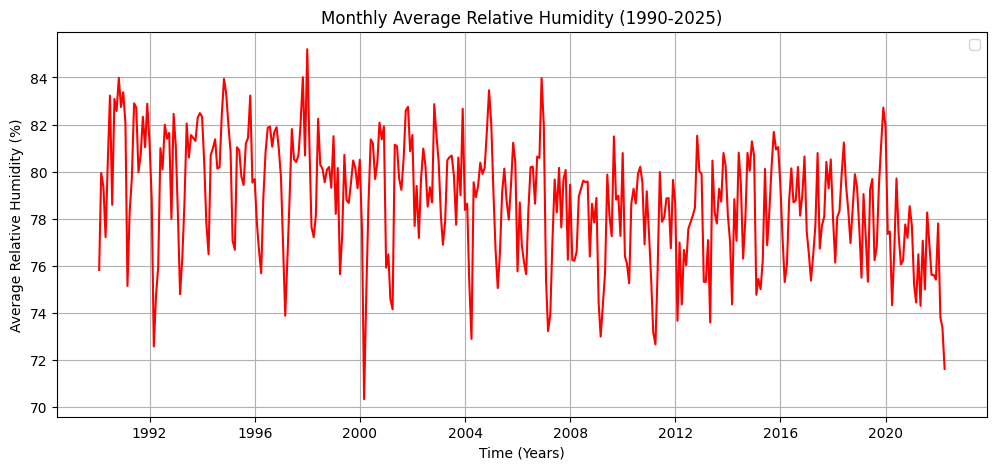

In [ ]:
# Monthly average

r_mean = ds.r.mean(dim=["latitude", "longitude"])

# Resample to get the monthly average
r_monthly = r_mean.resample(time="M").mean()

# Plot the seasonality (monthly averaged relative humidity variation)
plt.figure(figsize=(12, 5))
plt.plot(r_monthly.time, r_monthly, color='r')

# Formatting the plot
plt.xlabel("Time (Years)")
plt.ylabel("Average Relative Humidity (%)")
plt.title("Monthly Average Relative Humidity (1990-2025)")
plt.legend()
plt.grid()

# Show the plot
plt.show()


In [ ]:
print(r_mean.dims)   # Check dimensions
print(r_mean.shape)  # Check shape
print(r_mean.coords) # Check coordinates


('time',)
(282567,)
Coordinates:
    number         int64 8B 0
    step           timedelta64[ns] 8B 00:00:00
    isobaricInhPa  float64 8B 1e+03
    valid_time     (time) datetime64[ns] 2MB 1990-01-01 ... 2022-03-27T14:00:00
  * time           (time) datetime64[ns] 2MB 1990-01-01 ... 2022-03-27T14:00:00


/usr/local/lib/python3.11/dist-packages/xarray/groupers.py:487: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


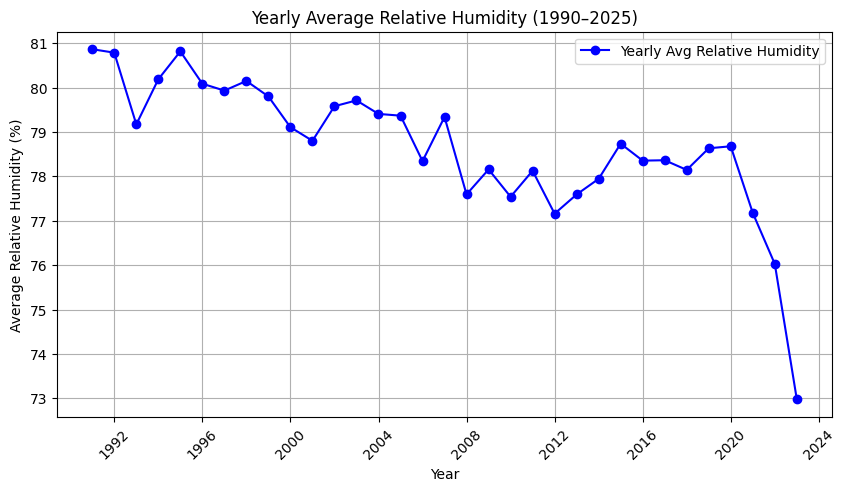

In [ ]:
import matplotlib.pyplot as plt

# Resample directly to yearly average using existing 'time' dimension
r_yearly = r_mean.resample(time="Y").mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(r_yearly.time, r_yearly, marker='o', linestyle='-', color='b', label="Yearly Avg Relative Humidity")

# Labels and formatting
plt.xlabel("Year")
plt.ylabel("Average Relative Humidity (%)")
plt.title("Yearly Average Relative Humidity (1990–2025)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


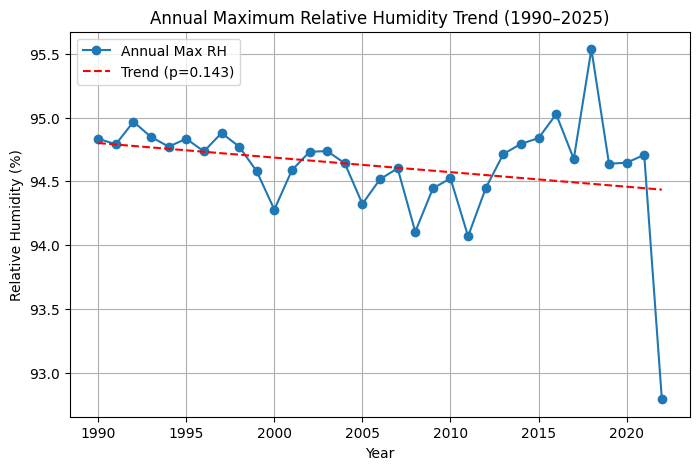

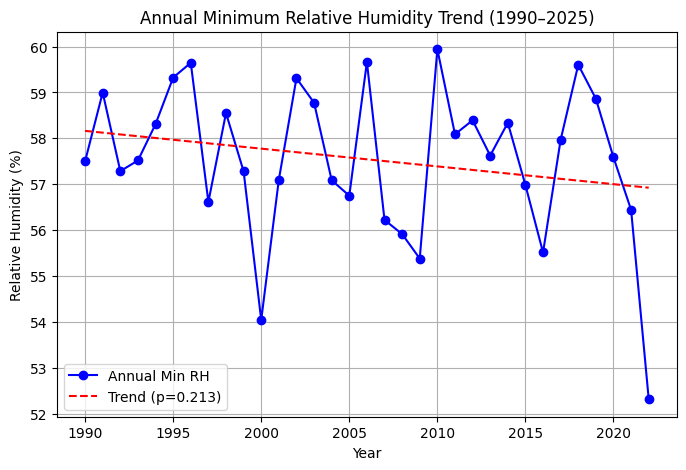

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Ensure 'time' is decoded correctly
ds["time"] = xr.decode_cf(ds)["time"]

# Extract the year from time
ds = ds.assign_coords(year=ds["time"].dt.year)

# Compute annual max and min relative humidity (spatially averaged)
annual_max_rh = ds.r.groupby("year").max(dim="time").mean(dim=["latitude", "longitude"])
annual_min_rh = ds.r.groupby("year").min(dim="time").mean(dim=["latitude", "longitude"])

# Convert year coordinate to NumPy array
years = annual_max_rh.coords["year"].values

# Squeeze dimensions
annual_max_rh = annual_max_rh.squeeze()
annual_min_rh = annual_min_rh.squeeze()

# If needed, average over 'step'
if annual_max_rh.ndim > 1:
    annual_max_rh = annual_max_rh.mean(dim="step")
if annual_min_rh.ndim > 1:
    annual_min_rh = annual_min_rh.mean(dim="step")

# Linear regression for max and min
slope_max, intercept_max, r_max, p_max, stderr_max = linregress(years, annual_max_rh.values)
slope_min, intercept_min, r_min, p_min, stderr_min = linregress(years, annual_min_rh.values)

# Plot: Annual Max RH
plt.figure(figsize=(8, 5))
plt.plot(years, annual_max_rh, marker='o', linestyle='-', label="Annual Max RH")
plt.plot(years, slope_max * years + intercept_max, 'r--', label=f"Trend (p={p_max:.3f})")
plt.xlabel("Year")
plt.ylabel("Relative Humidity (%)")
plt.title("Annual Maximum Relative Humidity Trend (1990–2025)")
plt.legend()
plt.grid()
plt.show()

# Plot: Annual Min RH
plt.figure(figsize=(8, 5))
plt.plot(years, annual_min_rh, marker='o', linestyle='-', color='blue', label="Annual Min RH")
plt.plot(years, slope_min * years + intercept_min, 'r--', label=f"Trend (p={p_min:.3f})")
plt.xlabel("Year")
plt.ylabel("Relative Humidity (%)")
plt.title("Annual Minimum Relative Humidity Trend (1990–2025)")
plt.legend()
plt.grid()
plt.show()


(282567, 32, 5) (282567,)


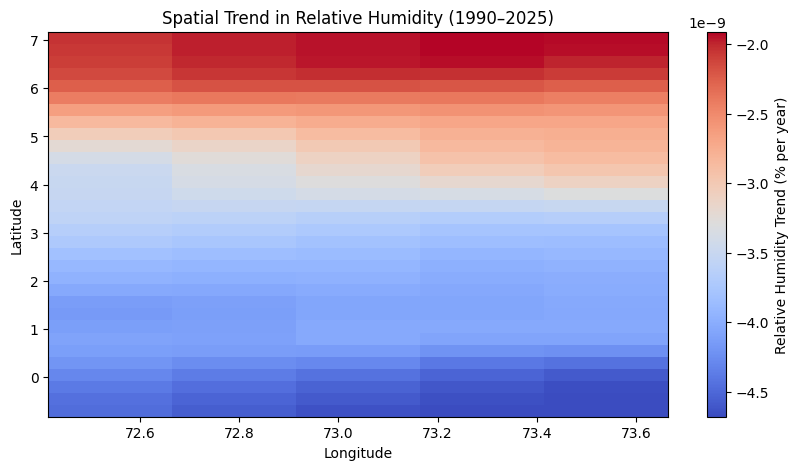

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.interpolate import griddata

# Extract data
rh = ds.variables["r"][:]  # Shape: (time, lat, lon)
time = ds.variables["time"][:]
lat = ds.variables["latitude"][:]
lon = ds.variables["longitude"][:]

# Check shape (optional)
print(rh.shape, time.shape)

# Convert time to years
time = np.array([t.astype('datetime64[Y]').astype(int) + 1970 for t in time])

# Prepare array for storing slopes (trend at each grid point)
trend_map = np.full((len(lat), len(lon)), np.nan)

# Compute trends for each grid cell
for i in range(len(lat)):
    for j in range(len(lon)):
        rh_series = rh[:, i, j]  # Time series at one grid point

        if np.all(np.isnan(rh_series)):  # Skip if all are NaNs
            continue

        slope, _, _, p_value, _ = linregress(time, rh_series)

        # Store only significant trends (p < 0.05)
        if p_value < 0.05:
            trend_map[i, j] = slope

# Interpolate missing values
lat_grid, lon_grid = np.meshgrid(lat, lon, indexing='ij')
mask = ~np.isnan(trend_map)
points = np.column_stack((lat_grid[mask], lon_grid[mask]))
values = trend_map[mask]
trend_map_interp = griddata(points, values, (lat_grid, lon_grid), method='linear')

# Plot
plt.figure(figsize=(10, 5))
plt.pcolormesh(lon, lat, trend_map_interp, cmap="coolwarm", shading="nearest")
plt.colorbar(label="Relative Humidity Trend (% per year)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial Trend in Relative Humidity (1990–2025)")
plt.show()


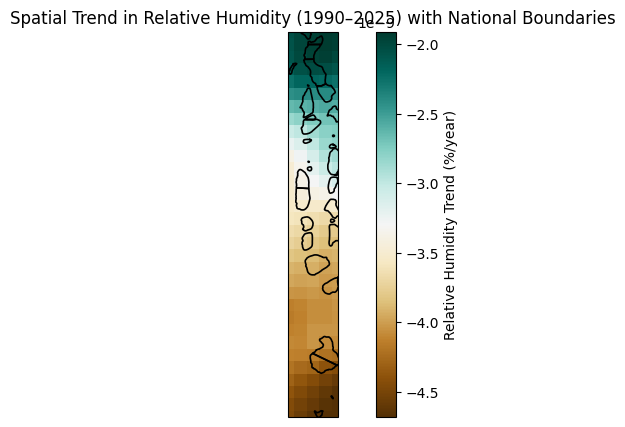

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
from scipy.stats import linregress
from scipy.interpolate import griddata

# ---- Step 1: Extract Data ----
rh = ds.variables["r"][:]  # Relative humidity (time, lat, lon)
time = ds.variables["time"][:]
lat = ds.variables["latitude"][:]
lon = ds.variables["longitude"][:]

# Convert time to years
time = np.array([t.astype('datetime64[Y]').astype(int) + 1970 for t in time])

# ---- Step 2: Compute Trend Map ----
trend_map = np.full((len(lat), len(lon)), np.nan)

for i in range(len(lat)):
    for j in range(len(lon)):
        rh_series = rh[:, i, j]
        if np.all(np.isnan(rh_series)):
            continue
        slope, _, _, p_value, _ = linregress(time, rh_series)
        if p_value < 0.05:
            trend_map[i, j] = slope

# ---- Step 3: Interpolate Missing Values ----
lat_grid, lon_grid = np.meshgrid(lat, lon, indexing='ij')
mask = ~np.isnan(trend_map)
points = np.column_stack((lat_grid[mask], lon_grid[mask]))
values = trend_map[mask]
trend_map_interp = griddata(points, values, (lat_grid, lon_grid), method='linear')

# ---- Step 4: Load Shapefile for Country Boundaries ----
shapefile_path = "maldives_admin_division.shp"  # Adjust this path as needed
gdf = gpd.read_file(shapefile_path)

# Reproject if needed
if gdf.crs is not None and gdf.crs.to_epsg() != 4326:
    gdf = gdf.to_crs(epsg=4326)

# ---- Step 5: Plot with Cartopy ----
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={"projection": ccrs.PlateCarree()})

# Plot trend data
trend_plot = ax.pcolormesh(lon, lat, trend_map_interp, cmap="BrBG", shading="auto", transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(trend_plot, ax=ax, orientation="vertical", label="Relative Humidity Trend (%/year)")

# Plot shapefile boundary
gdf.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1.2, transform=ccrs.PlateCarree())

# Set extent
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree())

# Add labels
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Spatial Trend in Relative Humidity (1990–2025) with National Boundaries")

plt.show()
